In [1]:
import numpy as np                # for numerical arrays
import pandas as pd               # to load and work with CSV data
import matplotlib.pyplot as plt   # for plotting graphs
import cv2                        # for image processing (face detection)
from sklearn.model_selection import train_test_split  # to split data into training and test sets
# TensorFlow/Keras for building deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import files
uploaded = files.upload()


Saving fer2013.zip to fer2013.zip


In [3]:
import zipfile
with zipfile.ZipFile("fer2013.zip", 'r') as zip_ref:
    zip_ref.extractall("fer2013")


In [4]:
train_dir = "/content/fer2013/train"
test_dir = "/content/fer2013/test"


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale pixel values (0-255 to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Load training images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),           # resize all images to 48x48
    color_mode='grayscale',         # grayscale since FER images are not colored
    class_mode='categorical',       # convert labels to one-hot encoded
    batch_size=64,
    shuffle=True
)
# Load testing images from folders
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Step 1: Initialize the model
model = Sequential()
# Step 2: Add first convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Step 3: Second convolution + pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Step 4: Flatten the 2D output to 1D for the Dense layer
model.add(Flatten())
# Step 5: Fully connected hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# Step 6: Output layer
model.add(Dense(7, activation='softmax'))
# Step 7: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Step 8: Print summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,353,351 (12.79 MB)

 Trainable params: 3,353,351 (12.79 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    train_generator,              # Training data
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 206s 455ms/step - accuracy: 0.2967 - loss: 1.7275 - val_accuracy: 0.4411 - val_loss: 1.4434
Epoch 2/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:54 390ms/step - accuracy: 0.2969 - loss: 1.6441

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.2969 - loss: 1.6441 - val_accuracy: 0.4379 - val_loss: 1.4467
Epoch 3/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 262s 484ms/step - accuracy: 0.4528 - loss: 1.4325 - val_accuracy: 0.4739 - val_loss: 1.3519
Epoch 4/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.4375 - loss: 1.4355 - val_accuracy: 0.4753 - val_loss: 1.3510
Epoch 5/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 263s 531ms/step - accuracy: 0.5008 - loss: 1.3066 - val_accuracy: 0.4947 - val_loss: 1.2949
Epoch 6/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5000 - loss: 1.2487 - val_accuracy: 0.4993 - val_loss: 1.2916
Epoch 7/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 262s 576ms/step - accuracy: 0.5390 - loss: 1.2183 - val_accuracy: 0.5120 - val_loss: 1.2632
Epoch 8/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.5625 - loss: 1.3976 - val_accuracy: 0.5151 - val_loss: 1.2597
Epoch 9/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 204s 456ms/step - accuracy: 0.5653 - loss: 1.1543 - val

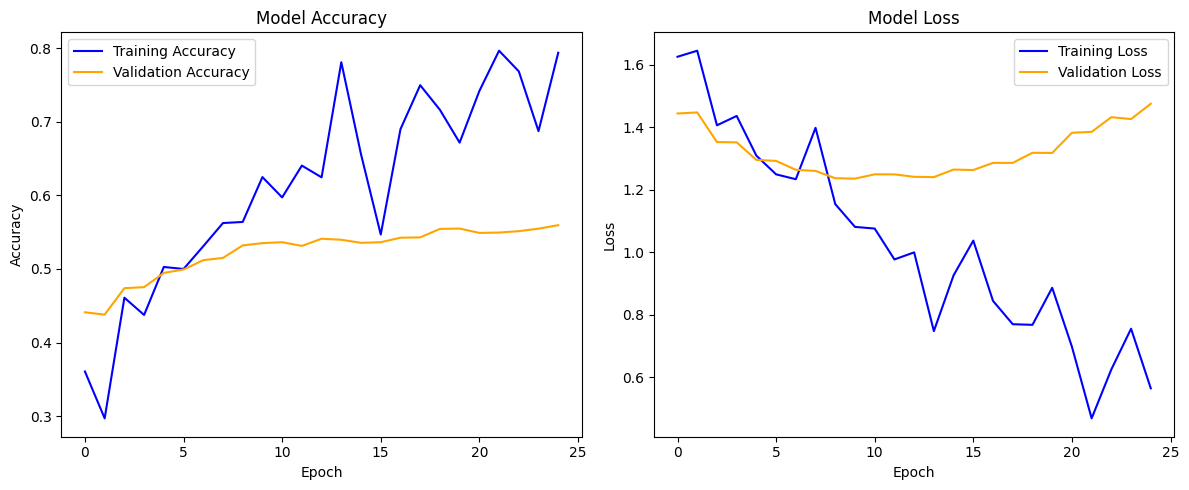

In [8]:
import matplotlib.pyplot as plt
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# Save the model to an H5 file
model.save("facial_expression_model.h5")
print(" Model saved as facial_expression_model.h5")


 Model saved as facial_expression_model.h5


In [10]:
from google.colab import files
uploaded = files.upload()


Saving face.jpg to face.jpg


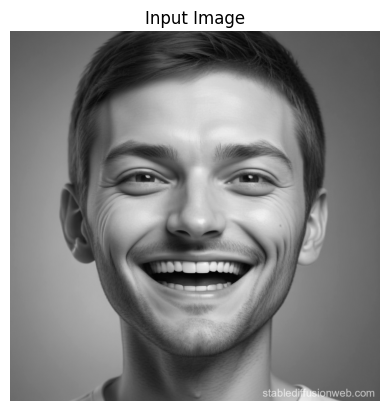

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread("face.jpg")
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Resize to 48x48
resized = cv2.resize(gray, (48, 48))
# Normalize and reshape
normalized = resized / 255.0
reshaped = np.reshape(normalized, (1, 48, 48, 1))  # (batch, height, width, channels)
# Visualize the image
plt.imshow(gray, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()


In [12]:
# Predict the emotion
prediction = model.predict(reshaped)
predicted_label = np.argmax(prediction)
# Emotion classes
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_classes[predicted_label]
print(" Predicted Emotion:", predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
 Predicted Emotion: Happy


In [13]:
!pip install gradio


In [14]:
from tensorflow.keras.models import load_model
model = load_model("facial_expression_model.h5")


In [15]:
import gradio as gr
import numpy as np
from PIL import Image
# Emotion label
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Define prediction function
def predict_emotion(img: Image.Image):
    # Convert to grayscale
    img = img.convert("L")
    img = img.resize((48, 48))
    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 48, 48, 1)
    # Make prediction
    prediction = model.predict(img_array)
    emotion_idx = np.argmax(prediction)

    return f"Predicted Emotion: {emotion_classes[emotion_idx]}"


In [16]:
gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(type="pil", label="Upload a Face Image"),
    outputs="text",
    title=" Facial Expression Recognition",
    description="Upload a face image and this AI model will predict the emotion."
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc924f17710f2c3821.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
